Множетели Лагранжа

In [1]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))


Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [2]:
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
sols

[(1.00000000000000, 0.0, 0.707106781186548)]

In [3]:
a, b, h, w = symbols(' a b h w' )
g = 2*(a*b + a*h + b*h)
q = a*b*h - 1
f = 2*(a*b + a*h + b*h) + w*(a*b*h - 1)
fa = f.diff(a)
fb = f.diff(b)
fh = f.diff(h)
fw = f.diff(w)
sols = solve([fa,fb,fh,fw],a,b,h,w)
sols[0]

(1, 1, 1, -4)

In [4]:
a,b,c,w=symbols('a b c w')
g = 2*(a*b + a*c + b*c)

L = 2*(a*b + a*c + b*c) + w*(a*b*c - 1)

L_a = L.diff(a)
L_b = L.diff(b)
L_c = L.diff(c)
L_w = L.diff(w)

print(solve([L_a, L_b, L_c, L_w], a, b, c, w)[0])

(1, 1, 1, -4)


In [5]:

from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


# Градиент

In [6]:
import numpy as np
f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)
 
np.gradient(f)

C:\Users\User\AppData\Local\Temp\ipykernel_1404\1035907994.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [7]:
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [8]:
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

In [9]:
np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))
#2.75
#4.0
#5.5
#6.0

2.75
4.0
5.5
6.0


In [11]:
M1 = np.array([[6., 18.], [18., 70.]])
v1 = np.array([18.2, 62.6])
np.linalg.solve(M1, v1)

array([1.53333333, 0.5       ])

In [12]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# Градиентный спуск

In [26]:
import matplotlib.pyplot as plt

In [21]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [22]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [23]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [24]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

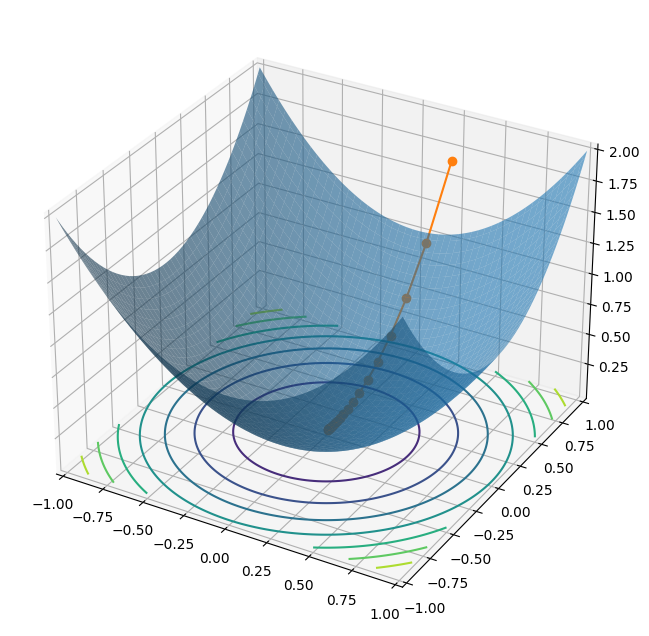

In [27]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)